# Kaggle Analysis: Rain in Australia: Predict next-day rain in Australia

#### Content
This dataset contains about 10 years of daily weather observations from many locations across Australia.

RainTomorrow is the target variable to predict. It means -- did it rain the next day, Yes or No? This column is Yes if the rain for that day was 1mm or more.

In [1]:
# Import libraries 

from my_lib2 import *
from geopy.geocoders import Nominatim

# Data loading

In [2]:
df_raw = pd.read_csv('weatherAUS.csv') # training data
df = df_raw.copy()
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


# Data preprocessing

### Processing (transform into numerical values) & Missing Data Handling

In [3]:
df.shape

(145460, 23)

In [4]:
# Categories

for col in df.select_dtypes('object').columns:
    print('\n' '{}' '\n' '{}'.format(col, df[col].unique()))


Date
['2008-12-01' '2008-12-02' '2008-12-03' ... '2008-01-29' '2008-01-30'
 '2008-01-31']

Location
['Albury' 'BadgerysCreek' 'Cobar' 'CoffsHarbour' 'Moree' 'Newcastle'
 'NorahHead' 'NorfolkIsland' 'Penrith' 'Richmond' 'Sydney' 'SydneyAirport'
 'WaggaWagga' 'Williamtown' 'Wollongong' 'Canberra' 'Tuggeranong'
 'MountGinini' 'Ballarat' 'Bendigo' 'Sale' 'MelbourneAirport' 'Melbourne'
 'Mildura' 'Nhil' 'Portland' 'Watsonia' 'Dartmoor' 'Brisbane' 'Cairns'
 'GoldCoast' 'Townsville' 'Adelaide' 'MountGambier' 'Nuriootpa' 'Woomera'
 'Albany' 'Witchcliffe' 'PearceRAAF' 'PerthAirport' 'Perth' 'SalmonGums'
 'Walpole' 'Hobart' 'Launceston' 'AliceSprings' 'Darwin' 'Katherine'
 'Uluru']

WindGustDir
['W' 'WNW' 'WSW' 'NE' 'NNW' 'N' 'NNE' 'SW' nan 'ENE' 'SSE' 'S' 'NW' 'SE'
 'ESE' 'E' 'SSW']

WindDir9am
['W' 'NNW' 'SE' 'ENE' 'SW' 'SSE' 'S' 'NE' nan 'SSW' 'N' 'WSW' 'ESE' 'E'
 'NW' 'WNW' 'NNE']

WindDir3pm
['WNW' 'WSW' 'E' 'NW' 'W' 'SSE' 'ESE' 'ENE' 'NNW' 'SSW' 'SW' 'SE' 'N' 'S'
 'NNE' nan 'NE']

RainTod

In [5]:
# Date: get days, months and years columns

days = np.array(np.zeros(len(df['Date'])*1, dtype=object)).reshape(len(df['Date']),1)
months = np.array(np.zeros(len(df['Date'])*1, dtype=object)).reshape(len(df['Date']),1)
years = np.array(np.zeros(len(df['Date'])*1, dtype=object)).reshape(len(df['Date']),1)

for i, val in enumerate(df['Date']):
    days[i] = get_day_of_year(val)
    months[i] = get_month_of_year(val)
    years[i] = get_year(val)

df = pd.concat([df, pd.DataFrame(days, columns=['day_of_year']).astype(float)], axis= 1)
df = pd.concat([df, pd.DataFrame(months, columns=['month_of_year']).astype(float)], axis= 1)
df = pd.concat([df, pd.DataFrame(years, columns=['year']).astype(float)], axis= 1)

In [6]:
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,day_of_year,month_of_year,year
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,1007.1,8.0,NaN,16.9,21.8,No,No,336.0,12.0,2008.0
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,1007.8,NaN,NaN,17.2,24.3,No,No,337.0,12.0,2008.0
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,1008.7,NaN,2.0,21.0,23.2,No,No,338.0,12.0,2008.0
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,1012.8,NaN,NaN,18.1,26.5,No,No,339.0,12.0,2008.0
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,1006.0,7.0,8.0,17.8,29.7,No,No,340.0,12.0,2008.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,1020.3,NaN,NaN,10.1,22.4,No,No,172.0,6.0,2017.0
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,1019.1,NaN,NaN,10.9,24.5,No,No,173.0,6.0,2017.0
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,1016.8,NaN,NaN,12.5,26.1,No,No,174.0,6.0,2017.0
145458,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,1016.5,3.0,2.0,15.1,26.0,No,No,175.0,6.0,2017.0


In [7]:
# Location (geocoding with Nominatim geocoder from geopy -> latitude & longitude for each location)

lat = {}
lon = {}
for place in df['Location'].unique():
    geolocator = Nominatim(user_agent="my_user_agent")
    city = place
    country ="Australia"
    loc = geolocator.geocode(city+','+ country)   
    try:   
        lat[place] = loc.latitude
        lon[place] = loc.longitude
    except:
        lat[place] = None
        lon[place] = None
    geo = {'lat' : lat, 'lon' : lon} # geographic coordinate


col_lat = np.array(np.zeros(len(df['Location'])*1)).reshape(len(df['Location']),1)
col_lon = np.array(np.zeros(len(df['Location'])*1)).reshape(len(df['Location']),1)

for i, k in enumerate(df['Location']):
    col_lat[i] = geo['lat'][k]
    col_lon[i] = geo['lon'][k]
df = pd.concat([df, pd.DataFrame(col_lat, columns=['Loc_latitude'])], axis= 1)
df = pd.concat([df, pd.DataFrame(col_lon, columns=['Loc_longitude'])], axis= 1)


In [8]:
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,day_of_year,month_of_year,year,Loc_latitude,Loc_longitude
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,NaN,16.9,21.8,No,No,336.0,12.0,2008.0,-36.080477,146.916280
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,NaN,17.2,24.3,No,No,337.0,12.0,2008.0,-36.080477,146.916280
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,2.0,21.0,23.2,No,No,338.0,12.0,2008.0,-36.080477,146.916280
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,NaN,18.1,26.5,No,No,339.0,12.0,2008.0,-36.080477,146.916280
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,8.0,17.8,29.7,No,No,340.0,12.0,2008.0,-36.080477,146.916280
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,NaN,10.1,22.4,No,No,172.0,6.0,2017.0,-25.344857,131.032517
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,NaN,10.9,24.5,No,No,173.0,6.0,2017.0,-25.344857,131.032517
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,NaN,12.5,26.1,No,No,174.0,6.0,2017.0,-25.344857,131.032517
145458,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,2.0,15.1,26.0,No,No,175.0,6.0,2017.0,-25.344857,131.032517


In [9]:
# Convert categorical data into numerical values

get_replace(df['RainTomorrow'],['No','Yes'], [0,1])
get_replace(df['RainToday'],['No','Yes'], [0,1])

In [10]:
for i in ['WindGustDir', 'WindDir9am', 'WindDir3pm']:
    get_replace(df[i],['W', 'NNW', 'SE', 'ENE', 'SW', 'SSE', 'S', 'NE', 'SSW', 'N', 'WSW', 'ESE', 'E', 
                       'NW', 'WNW', 'NNE'], [0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15])

In [11]:
# NaN detecting

nan_info(df)

tot_NaN: 427722, (10.5 %)


,NaN_count,%NaN
Sunshine,69835,48.01
Evaporation,62790,43.17
Cloud3pm,59358,40.81
Cloud9am,55888,38.42
Loc_longitude,42237,29.04
Loc_latitude,42237,29.04
Pressure9am,15065,10.36
Pressure3pm,15028,10.33
WindDir9am,10566,7.26
WindGustDir,10326,7.10


In [12]:
# Multiple NaNs (also replaced with different values) dramatically reduces accuracy to below 80%, so I drop them

df = df.dropna() 

In [13]:
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,day_of_year,month_of_year,year,Loc_latitude,Loc_longitude
6049,2009-01-01,Cobar,17.9,35.2,0.0,12.0,12.3,8.0,48.0,3.0,...,5.0,26.6,33.4,0.0,0.0,1.0,1.0,2009.0,-31.498333,145.834444
6050,2009-01-02,Cobar,18.4,28.9,0.0,14.8,13.0,6.0,37.0,5.0,...,1.0,20.3,27.0,0.0,0.0,2.0,1.0,2009.0,-31.498333,145.834444
6052,2009-01-04,Cobar,19.4,37.6,0.0,10.8,10.6,15.0,46.0,15.0,...,6.0,28.7,34.9,0.0,0.0,4.0,1.0,2009.0,-31.498333,145.834444
6053,2009-01-05,Cobar,21.9,38.4,0.0,11.4,12.2,14.0,31.0,14.0,...,5.0,29.1,35.6,0.0,0.0,5.0,1.0,2009.0,-31.498333,145.834444
6054,2009-01-06,Cobar,24.2,41.0,0.0,11.2,8.4,14.0,35.0,13.0,...,6.0,33.6,37.6,0.0,0.0,6.0,1.0,2009.0,-31.498333,145.834444
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142298,2017-06-20,Darwin,19.3,33.4,0.0,6.0,11.0,3.0,35.0,2.0,...,1.0,24.5,32.3,0.0,0.0,171.0,6.0,2017.0,-12.460440,130.841047
142299,2017-06-21,Darwin,21.2,32.6,0.0,7.6,8.6,12.0,37.0,2.0,...,0.0,24.8,32.0,0.0,0.0,172.0,6.0,2017.0,-12.460440,130.841047
142300,2017-06-22,Darwin,20.7,32.8,0.0,5.6,11.0,12.0,33.0,12.0,...,0.0,24.8,32.1,0.0,0.0,173.0,6.0,2017.0,-12.460440,130.841047
142301,2017-06-23,Darwin,19.5,31.8,0.0,6.2,10.6,11.0,26.0,2.0,...,1.0,24.8,29.2,0.0,0.0,174.0,6.0,2017.0,-12.460440,130.841047


### EDA: Data Visualization & Statistics

In [14]:
%matplotlib inline
sns.set_style("darkgrid")

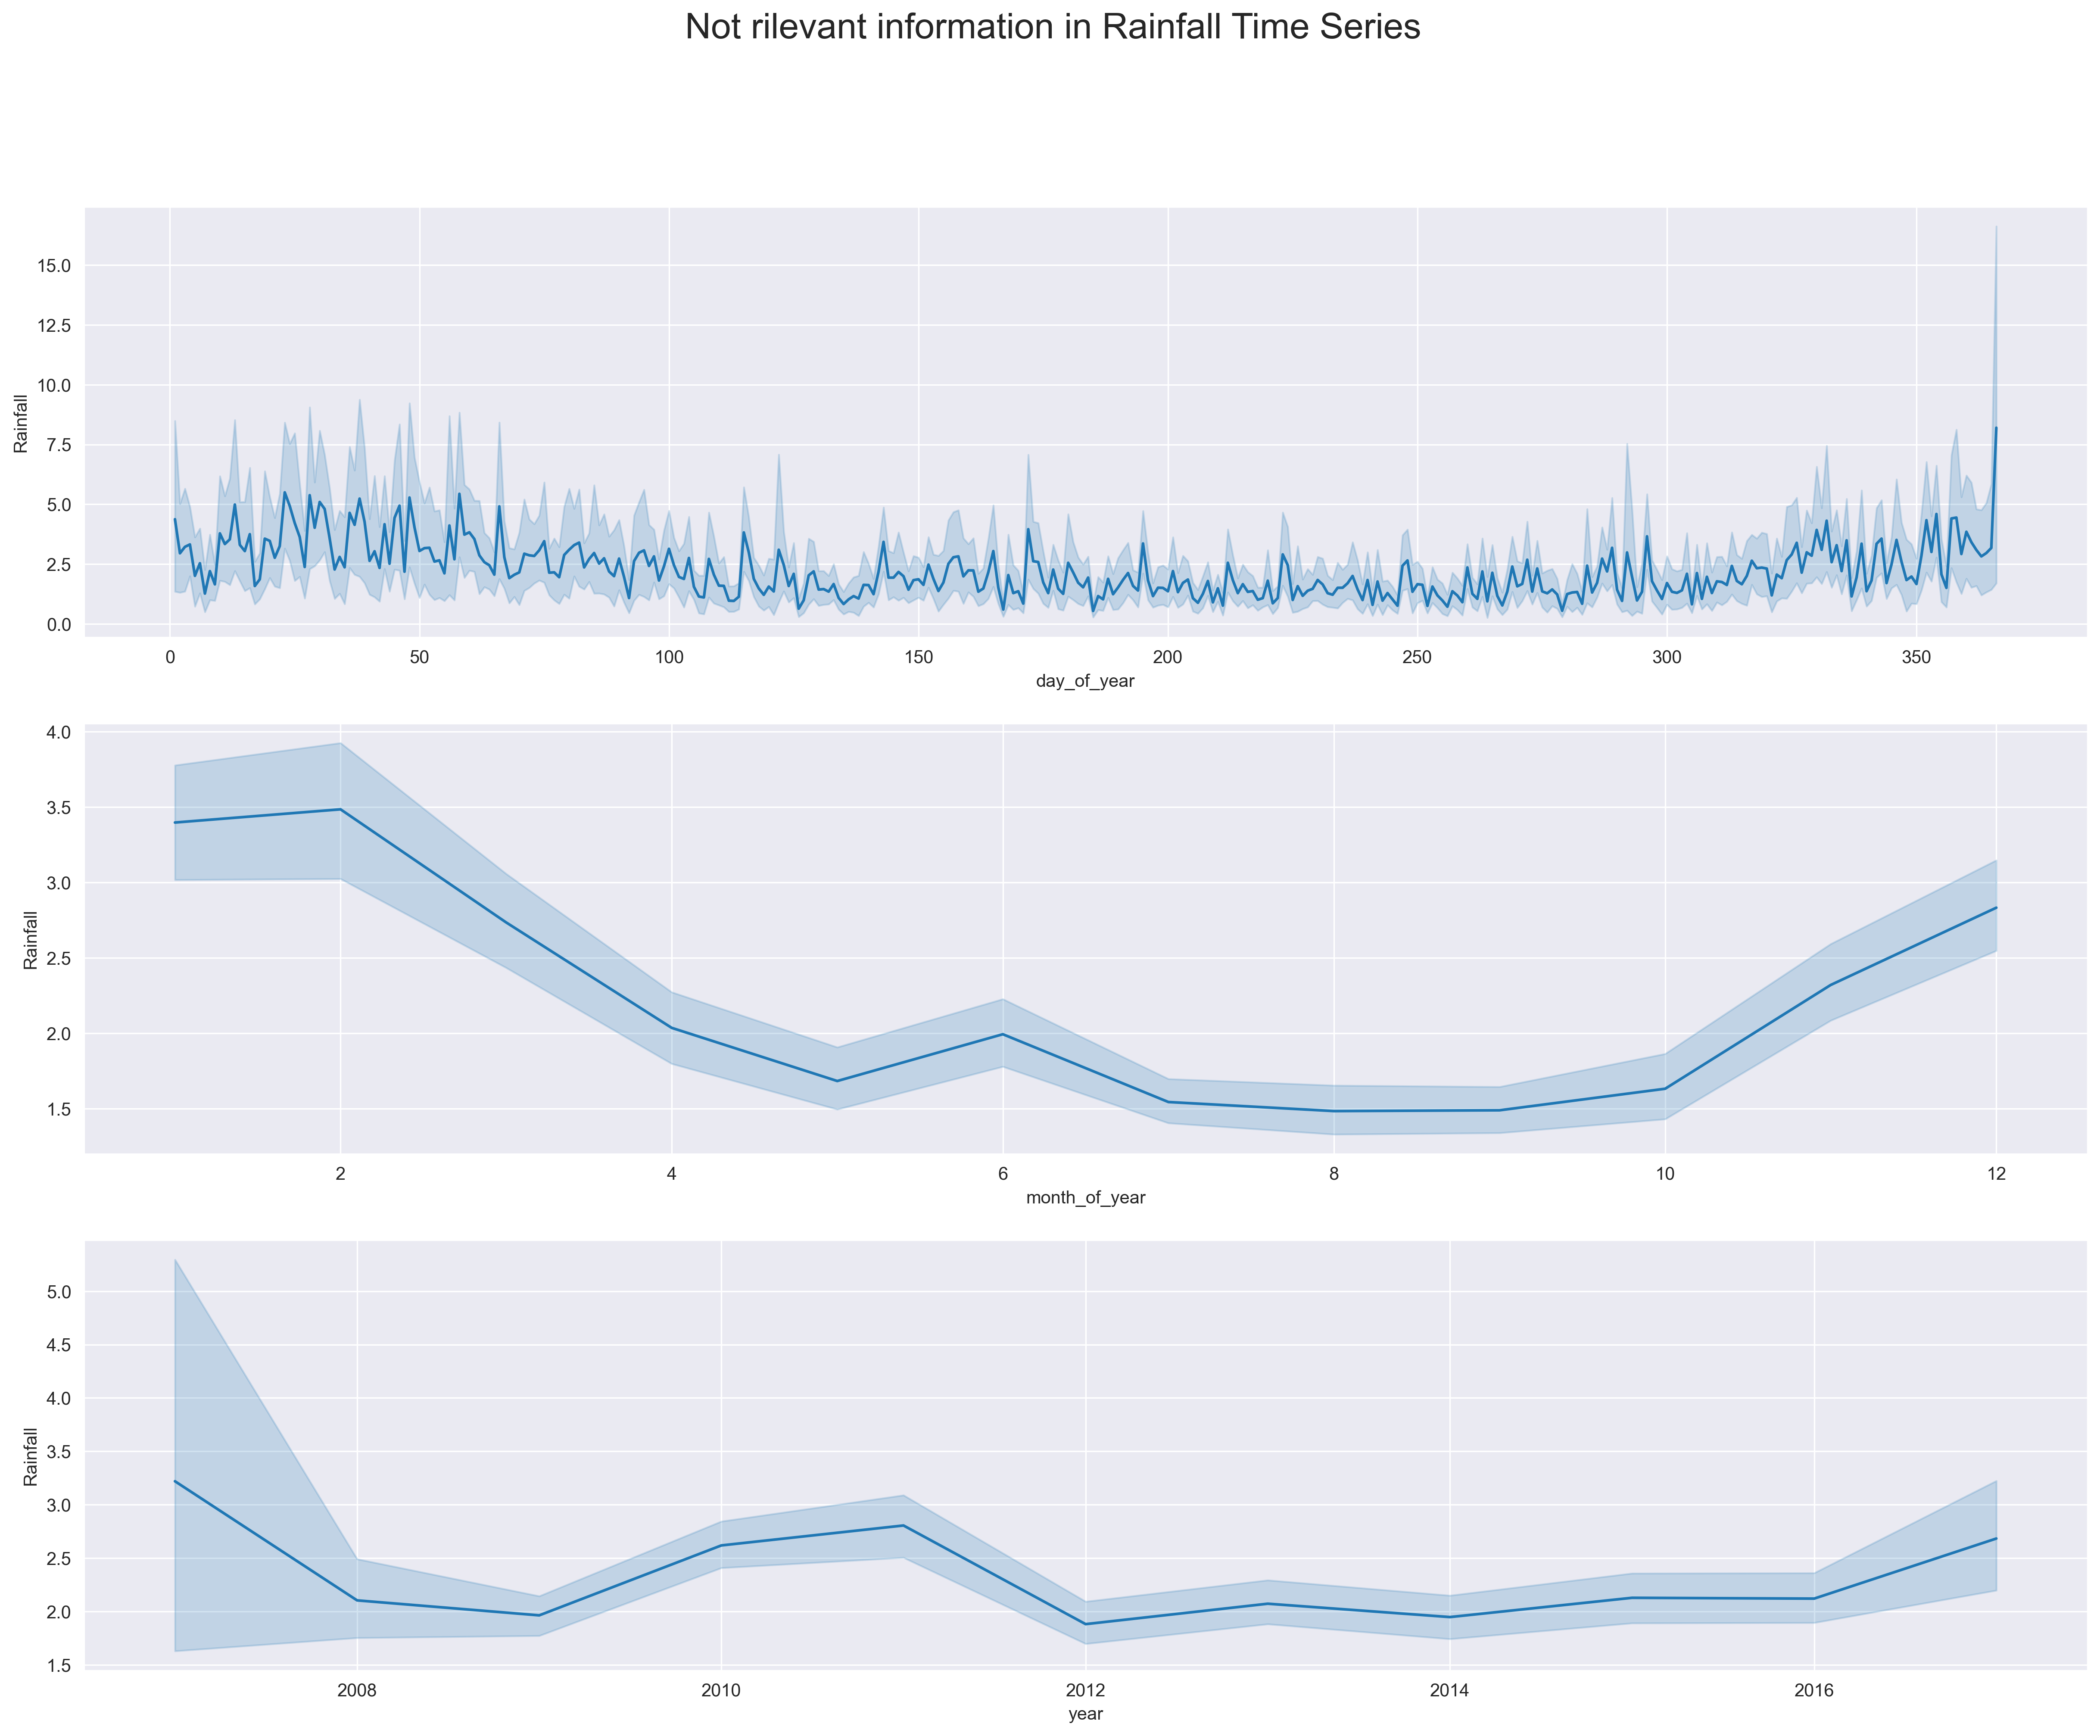

In [15]:
# Time series plots of Rainfall

fig, axs = plt.subplots(3,1, figsize=(20, 15), dpi=300)
fig.suptitle('Not rilevant information in Rainfall Time Series', fontsize = 20)
sns.lineplot(x="day_of_year", y="Rainfall", data=df, ax=axs[0])
sns.lineplot(x="month_of_year", y="Rainfall", data=df, ax=axs[1])
sns.lineplot(x="year", y="Rainfall", data=df, ax=axs[2])
plt.show()


 Location latitude and longitude are poorly correlated with the target variable RainTomorrow


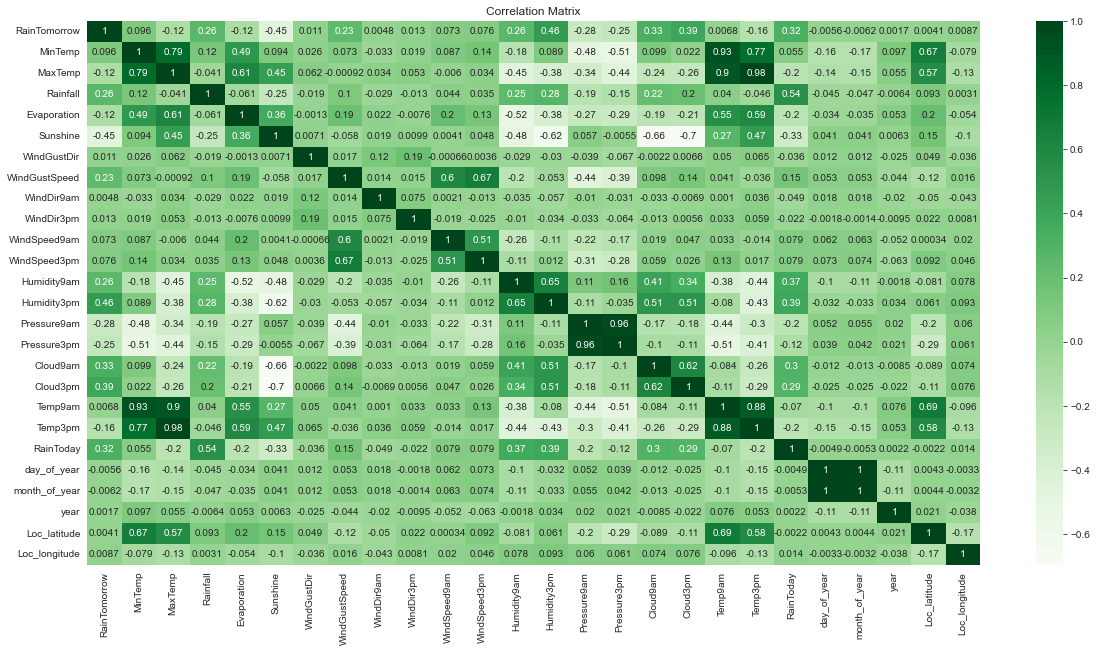

In [16]:
X = df.drop(['RainTomorrow','Date','Location'], axis=1)
y = df['RainTomorrow']

plot_correlation_matrix(X,y,'Greens')
print('\n Location latitude and longitude are poorly correlated with the target variable RainTomorrow')

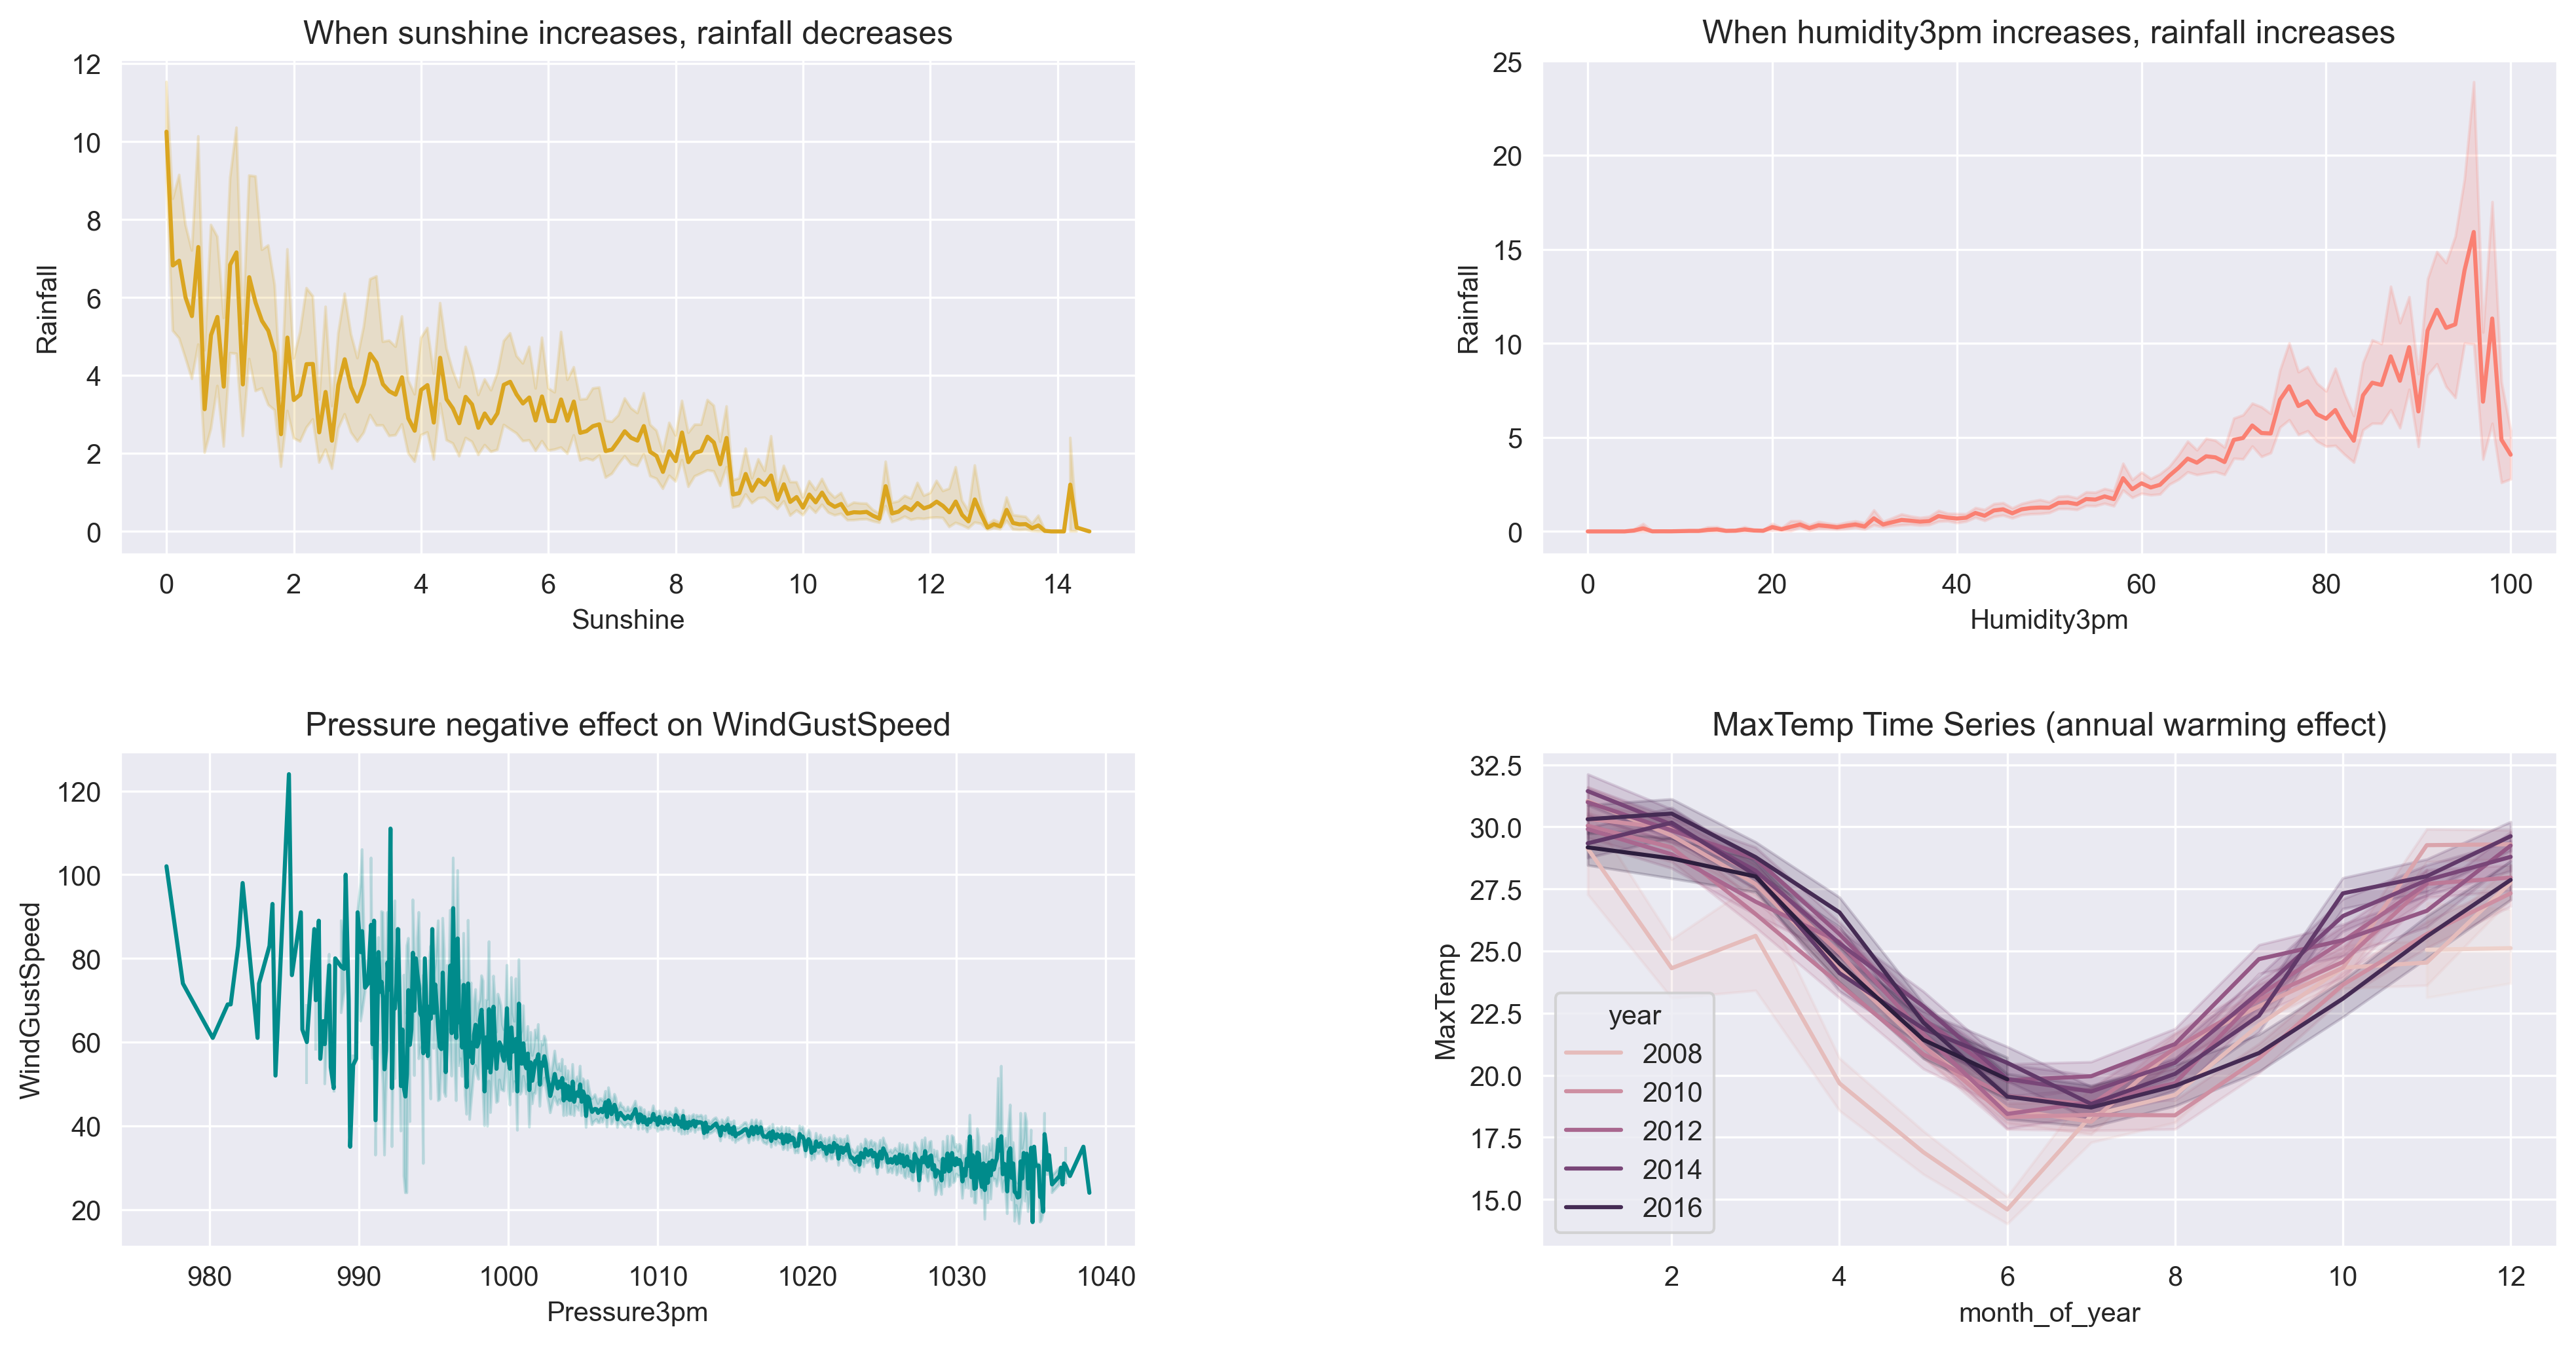

In [17]:
# Some insights

fig = plt.figure(figsize=(16, 8), dpi=300)
fig.subplots_adjust(hspace=0.4, wspace=0.4)
plt.subplot(221)
sns.lineplot(data=df, x='Sunshine', y='Rainfall', color='goldenrod').set(title="When sunshine increases, rainfall decreases")
plt.subplot(222)
sns.lineplot(data=df, x='Humidity3pm', y='Rainfall', color='salmon').set(title="When humidity3pm increases, rainfall increases")
plt.subplot(223)
sns.lineplot(data=df, x='Pressure3pm', y='WindGustSpeed', color='darkcyan').set(title='Pressure negative effect on WindGustSpeed')
plt.subplot(224)
sns.lineplot(data=df, x="month_of_year", y="MaxTemp", hue="year").set(title='MaxTemp Time Series (annual warming effect)')
plt.show()

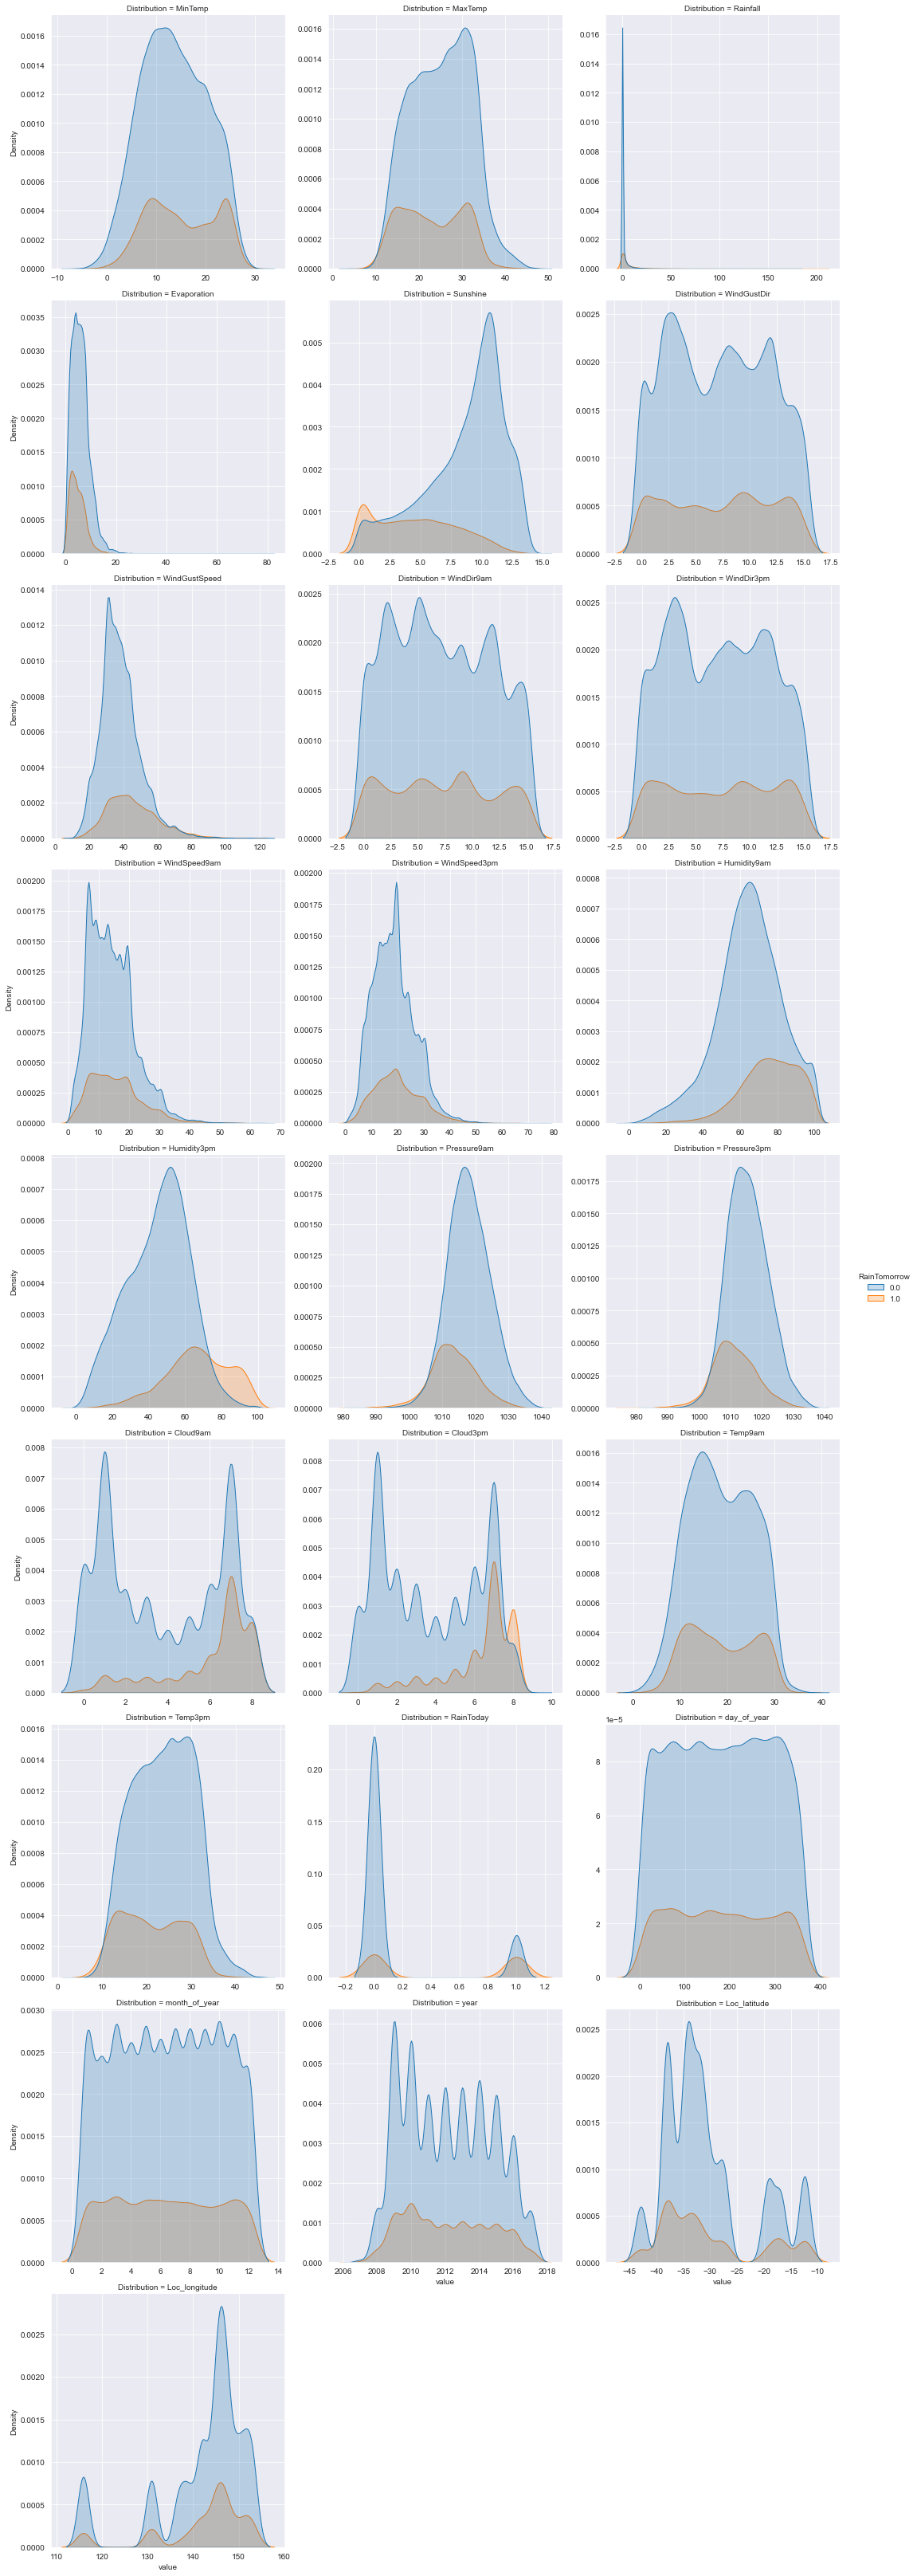

In [18]:
# convert the dataframe from wide to long

dfm = df.drop(['Date','Location'], axis=1).melt(id_vars='RainTomorrow', var_name='Distribution')

# density plots

sns.displot(kind='kde', data=dfm, col='Distribution', col_wrap=3, x='value', 
            hue='RainTomorrow', fill=True, facet_kws={'sharey': False, 'sharex': False})
plt.show()

### Scaling Data & Feature Selection

In [19]:
X.columns

Index(['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'day_of_year', 'month_of_year', 'year',
       'Loc_latitude', 'Loc_longitude'],
      dtype='object')

In [20]:
# Normalization

features = X.drop('RainToday', axis=1).columns
for i in features:
    X[i] = robust_scaler(X[i])

In [21]:
X.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,day_of_year,month_of_year,year,Loc_latitude,Loc_longitude
6049,0.415094,0.887931,0.0,1.478261,0.654545,0.125,0.733333,-0.500,-0.375,-0.7,...,-0.500000,0.0,0.752212,0.901786,0.0,-0.983607,-0.833333,-0.75,0.128555,0.090088
6050,0.462264,0.344828,0.0,2.086957,0.781818,-0.125,0.000000,-0.250,-0.250,0.6,...,-0.666667,-0.8,0.194690,0.330357,0.0,-0.978142,-0.833333,-0.75,0.128555,0.090088
6052,0.556604,1.094828,0.0,1.217391,0.345455,1.000,0.600000,1.000,-0.750,1.7,...,-0.666667,0.2,0.938053,1.035714,0.0,-0.967213,-0.833333,-0.75,0.128555,0.090088
6053,0.792453,1.163793,0.0,1.347826,0.636364,0.875,-0.400000,0.875,0.375,-0.7,...,-0.666667,0.0,0.973451,1.098214,0.0,-0.961749,-0.833333,-0.75,0.128555,0.090088
6054,1.009434,1.387931,0.0,1.304348,-0.054545,0.875,-0.133333,0.750,0.875,0.4,...,-0.666667,0.2,1.371681,1.276786,0.0,-0.956284,-0.833333,-0.75,0.128555,0.090088


In [22]:
# Dimensionality reduction (based on univariate ANOVA F-value test) for better model training time

X_new = SelectKBest(f_classif, k=12).fit(X, y)
print(X_new.get_support(indices = True))
X_new.get_support(indices = True)
X = X_new.transform(X)

[ 1  2  4  6 11 12 13 14 15 16 18 19]


# Imbalanced data

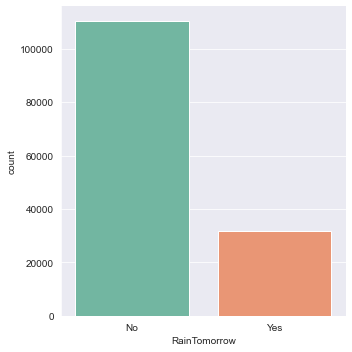

21.77% Yes


0.0    28757
1.0     8003
Name: RainTomorrow, dtype: int64

In [23]:
# Degree of imbalanced data

sns.catplot(data=df_raw, x = 'RainTomorrow', kind = 'count', palette = 'Set2')
plt.show()


mask0 = (y == 0.0)
mask1 = (y == 1.0)
Yes = len(y[mask1]) 
No = len(y[mask0])
imbd = round(Yes/(Yes+No)*100, 2) # % of labels=Yes

print('{}% Yes'.format(imbd))
y.value_counts()

In [24]:
X.shape

(36760, 12)

In [25]:
# Oversampling

ros = RandomOverSampler(random_state=0)
X_res, y_res = ros.fit_resample(X, y)
print(X_res.shape)
print(y_res.shape)

(57514, 12)
(57514,)


In [26]:
X_res

array([[ 8.87931034e-01,  0.00000000e+00,  6.54545455e-01, ...,
         0.00000000e+00,  9.01785714e-01,  0.00000000e+00],
       [ 3.44827586e-01,  0.00000000e+00,  7.81818182e-01, ...,
        -8.00000000e-01,  3.30357143e-01,  0.00000000e+00],
       [ 1.09482759e+00,  0.00000000e+00,  3.45454545e-01, ...,
         2.00000000e-01,  1.03571429e+00,  0.00000000e+00],
       ...,
       [-5.08620690e-01,  1.83333333e+01, -6.54545455e-01, ...,
         0.00000000e+00, -4.37500000e-01,  1.00000000e+00],
       [-2.32758621e-01,  2.90000000e+01, -1.81818182e-02, ...,
         4.00000000e-01, -2.94642857e-01,  1.00000000e+00],
       [-9.91379310e-01,  2.60000000e+01, -5.45454545e-02, ...,
        -2.00000000e-01, -9.64285714e-01,  1.00000000e+00]])

# Model evaluation and selection

In [27]:
# storage of resampled data

X = X_res
y = y_res

random_state = 0

algorithms = {
              'knn': KNeighborsClassifier(),
              'lr': LogisticRegression(solver = 'liblinear'), 
              'dt': DecisionTreeClassifier(random_state=random_state),
              'bag': BaggingClassifier(random_state=random_state), 
              'rf': RandomForestClassifier(random_state=random_state), 
              'ab': AdaBoostClassifier(random_state=random_state),
             'gb': GradientBoostingClassifier(random_state=random_state),
             'xgb': XGBClassifier(use_label_encoder=False, eval_metric='logloss')
}

models = ['knn', 'lr', 'dt','bag','rf','ab','gb','xgb']

metrics = ['accuracy', 'roc_auc', 'precision', 'recall']

tuning_method = 'GridSearchCV'
# tuning_method = 'RandomizedSearchCV'

hpars={'rf' : {}}

n_splits = 5 # KFold_param
shuffle = True # KFold_param

inner_cv = StratifiedKFold(n_splits=n_splits, shuffle=shuffle, random_state=random_state)
outer_cv = StratifiedKFold(n_splits=n_splits, shuffle=shuffle, random_state=random_state)

judge = Judge().set_data(X,y).set_algorithms(algorithms).set_metrics(metrics).set_models(models)
judge.set_nested_cv(tuning_method, hpars, inner_cv, outer_cv)
judge.get_table()

Hyper-parameters optimization method: GridSearchCV


,accuracy,roc_auc,precision,recall
Model,,,,
knn,82.93,90.49,78.96,89.79
lr,80.15,88.55,80.70,79.24
dt,91.19,91.19,86.49,97.62
bag,93.72,98.35,91.03,97.00
rf,94.32,99.15,91.26,98.03
ab,79.67,88.39,80.05,79.05
gb,80.92,89.46,80.58,81.49
xgb,86.16,93.54,84.40,88.72


# Production model

In [28]:
# best model: RandomForestClassifier

base_estimator_prod = RandomForestClassifier(random_state=random_state)
clf_prod = GridSearchCV(base_estimator_prod, hpars['rf']) # best hyperparameters selection (default)
clf_prod.fit(X, y) # X, y -> whole training dataset
clf_prod.best_estimator_

# save the model to disk

filename = 'rain_in_australia.pickle'
pickle.dump(clf_prod, open(filename, 'wb'))